In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [318]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-400w", "zipf2b-200w", "zipf2b-100w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-125w_10_.pcap")
pcap_file.append("caida0816-600w_10_.pcap")
pcap_file.append("caida0816-300w_10_.pcap")
pcap_file.append("caida0816-150w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-75w_10_.pcap") 
pcap_file.append("zipf2a-35w_10_.pcap") 
pcap_file.append("zipf2b-400w_10_.pcap") 
pcap_file.append("zipf2b-200w_10_.pcap") 
pcap_file.append("zipf2b-100w_10_.pcap") 


# # # same dist, caida
for a in caida0517:
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

            
# # same dist, zipf
for a in zipf2a:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in zipf2b:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # diff dist, caida + zipf2a
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, caida + zipf2b
for a in caida0517:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # diff dist, zipf2a + caida
for a in zipf2a:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
for a in zipf2b:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-125w_10_.pcap', 'caida0816-600w_10_.pcap', 'caida0816-300w_10_.pcap', 'caida0816-150w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-75w_10_.pcap', 'zipf2a-35w_10_.pcap', 'zipf2b-400w_10_.pcap', 'zipf2b-200w_10_.pcap', 'zipf2b-100w_10_.pcap', 'caida0517-500w_6_caida0816-600w_4.pcap', 'caida0517-500w_6_caida0816-300w_4.pcap', 'caida0517-500w_6_caida0816-150w_4.pcap', 'caida0517-250w_6_caida0816-600w_4.pcap', 'caida0517-250w_6_caida0816-300w_4.pcap', 'caida0517-250w_6_caida0816-150w_4.pcap', 'caida0517-125w_6_caida0816-600w_4.pcap', 'caida0517-125w_6_caida0816-300w_4.pcap', 'caida0517-125w_6_caida0816-150w_4.pcap', 'caida0816-600w_6_caida0517-500w_4.pcap', 'caida0816-600w_6_caida0517-250w_4.pcap', 'caida0816-600w_6_caida0517-125w_4.pcap', 'caida0816-300w_6_caida0517-500w_4.pcap', 'caida0816-300w_6_caida0517-250w_4.pcap', 'caida0816-300w_6_caida0517-125w_4.pcap', 'caida0816-150w_6_caida0517-500w_4.pcap', 'caida0816-150w_6_caida

In [5]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [179]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

In [4]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [251]:
def prepare_profiler_dirty_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    
    profiler_fsd = {}
    # profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    # for file_name in sorted(os.listdir(profiler_folder_path)):
    #     # if file_name.split("-")[0] == "zipf4" or file_name.split("-")[0] == "caida0816" or file_name.split("-")[0] == "zipf2b":
    #     if file_name.split("-")[0] == "zipf4":
    #         continue
    #     profiler_fsd[file_name[:-9]] = []
    
    profiler_fsd["caida0517-125w"] = []
    profiler_fsd["caida0517-250w"] = []
    profiler_fsd["caida0517-500w"] = []
    profiler_fsd["caida0816-150w"] = []
    profiler_fsd["caida0816-300w"] = []
    profiler_fsd["caida0816-600w"] = []
    profiler_fsd["zipf2a-35w"] = []
    profiler_fsd["zipf2a-75w"] = []
    profiler_fsd["zipf2a-150w"] = []
    profiler_fsd["zipf2b-100w"] = []
    profiler_fsd["zipf2b-200w"] = []
    profiler_fsd["zipf2b-400w"] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOffline/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [252]:
def prepare_testing_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    
    profiler_fsd = {}
    # profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    # for file_name in sorted(os.listdir(profiler_folder_path)):
    #     # if file_name.split("-")[0] == "zipf4" or file_name.split("-")[0] == "caida0816" or file_name.split("-")[0] == "zipf2b":
    #     if file_name.split("-")[0] == "zipf4":
    #         continue
    #     profiler_fsd[file_name[:-9]] = []
    
    profiler_fsd["caida0517-125w"] = []
    profiler_fsd["caida0517-250w"] = []
    profiler_fsd["caida0517-500w"] = []
    profiler_fsd["caida0816-150w"] = []
    profiler_fsd["caida0816-300w"] = []
    profiler_fsd["caida0816-600w"] = []
    profiler_fsd["zipf2a-35w"] = []
    profiler_fsd["zipf2a-75w"] = []
    profiler_fsd["zipf2a-150w"] = []
    profiler_fsd["zipf2b-100w"] = []
    profiler_fsd["zipf2b-200w"] = []
    profiler_fsd["zipf2b-400w"] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [253]:
def prepare_testing_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    
    profiler_fsd = {}
    # profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file/"
    # for file_name in sorted(os.listdir(profiler_folder_path)):
    #     # if file_name.split("-")[0] == "zipf4" or file_name.split("-")[0] == "caida0816" or file_name.split("-")[0] == "zipf2b":
    #     if file_name.split("-")[0] == "zipf4":
    #         continue
    #     profiler_fsd[file_name[:-9]] = []
    
    profiler_fsd["caida0517-125w"] = []
    profiler_fsd["caida0517-250w"] = []
    profiler_fsd["caida0517-500w"] = []
    profiler_fsd["caida0816-150w"] = []
    profiler_fsd["caida0816-300w"] = []
    profiler_fsd["caida0816-600w"] = []
    profiler_fsd["zipf2a-35w"] = []
    profiler_fsd["zipf2a-75w"] = []
    profiler_fsd["zipf2a-150w"] = []
    profiler_fsd["zipf2b-100w"] = []
    profiler_fsd["zipf2b-200w"] = []
    profiler_fsd["zipf2b-400w"] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [3]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    
    return avg_fsd


---

In [300]:
def plot_mrd_between_profilers():
    # prepare profiler avg dirty fsd
    profiler_fsd = prepare_profiler_dirty_fsd_data()
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    # prepare testing avg fsd
    testing_fsd = prepare_testing_fsd_data()
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = get_avg_fsd(fsd_list[:15])
        
    MRDs = []
    # adjust dataset order
    labels = list(profiler_avg_fsd.keys())
    indexs = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3']
    
    ## cal by avg fsd
    for testing_name, t_fsd in testing_avg_fsd.items():
        single_MRDs = []
        for profiler_name, p_fsd in profiler_avg_fsd.items():
            mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
            single_MRDs.append(mrd)
        MRDs.append(single_MRDs)
    
    ## cal by avg mrd
    # for testing_name, t_fsd in testing_fsd.items():
    #     single_MRDs = []
    #     for profiler_name, p_fsd in profiler_avg_fsd.items():
    #         total_mrd = 0.0
    #         for fsd in t_fsd:
    #             mrd = calculate_mrd(p_fsd, fsd)
    #             total_mrd += mrd
    #         single_MRDs.append(round(total_mrd/len(t_fsd), 2))
    #     MRDs.append(single_MRDs)
    
    # Plot heatmap
    color = 'Blues'
    plt.figure(figsize=(10, 10))
    plt.imshow(MRDs, cmap=color , interpolation='nearest')

    # Add annotations for each cell
    for i in range(len(MRDs)):
        for j in range(len(MRDs[i])):
            plt.text(j, i, f'{MRDs[i][j]:.2f}', ha='center', va='center', color='black')

    plt.xticks(np.arange(len(labels)), indexs, rotation=0)
    plt.yticks(np.arange(len(labels)), indexs, rotation=0)
    

    plt.xlabel('Profilers', fontsize=16)
    plt.ylabel('Testing', fontsize=16)
    plt.title('MRD - DirtyFSD', fontsize=20)
    plt.colorbar(shrink=0.6)  # Add colorbar
    for i, label in enumerate(labels):
        plt.text(len(labels)+4, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
        
    for i in range(len(MRDs)):
        min_value_index = np.argmin(MRDs[i])  # find idx with min val
        plt.gca().add_patch(plt.Rectangle((min_value_index-0.5, i-0.5), 1, 1, fill=False, edgecolor='Black', linewidth=2))
        
    plt.tight_layout()
    plt.show()   
        

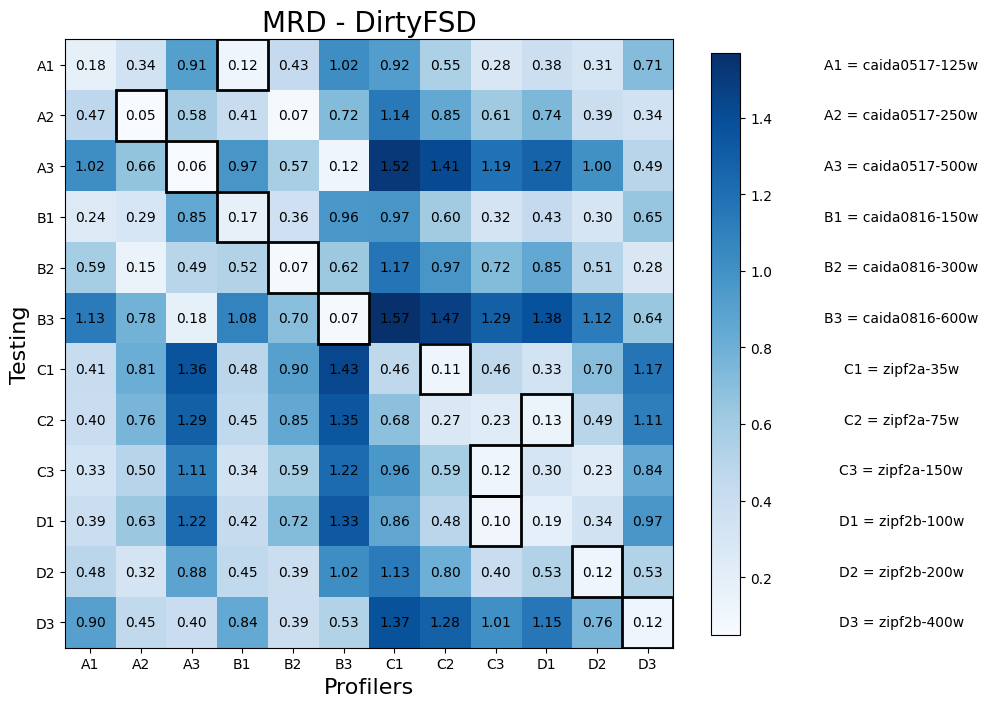

In [301]:
plot_mrd_between_profilers()

---


In [286]:
def plot_mrd_between_profilers_gt():
    # prepare testing avg fsd
    testing_fsd = prepare_testing_fsd_data()
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    # prepare testing gt avg fsd
    testing_gt_fsd = prepare_testing_gt_fsd_data()
    testing_gt_avg_fsd = {}
    for name, fsd_list in testing_gt_fsd.items():
        testing_gt_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    # adjust dataset order
    labels = list(testing_gt_avg_fsd.keys())
    indexs = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3']
    
    MRDs = []
    # ## cal by avg fsd
    # for testing_name, t_fsd in testing_avg_fsd.items():
    #     single_MRDs = []
    #     for profiler_name, p_fsd in testing_gt_avg_fsd.items():
    #         mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
    #         single_MRDs.append(mrd)
    #     MRDs.append(single_MRDs)
    
    # cal by avg mrd
    for testing_name, t_fsd in testing_fsd.items():
        single_MRDs = []
        for profiler_name, p_fsd in testing_gt_avg_fsd.items():
            total_mrd = 0.0
            for fsd in t_fsd:
                mrd = calculate_mrd(p_fsd, fsd)
                total_mrd += mrd
            single_MRDs.append(round(total_mrd/len(t_fsd), 2))
        MRDs.append(single_MRDs)
    
    # Plot heatmap
    color = 'Reds'
    plt.figure(figsize=(10, 10))
    plt.imshow(MRDs, cmap=color , interpolation='nearest')

    # Add annotations for each cell
    for i in range(len(MRDs)):
        for j in range(len(MRDs[i])):
            plt.text(j, i, f'{MRDs[i][j]:.2f}', ha='center', va='center', color='black')

    plt.xticks(np.arange(len(labels)), indexs, rotation=0)
    plt.yticks(np.arange(len(labels)), indexs, rotation=0)
    

    plt.xlabel('Profilers', fontsize=16)
    plt.ylabel('Testing', fontsize=16)
    plt.title('MRD - CleanFSD', fontsize=20)
    plt.colorbar(shrink=0.6)  # Add colorbar
    for i, label in enumerate(labels):
        plt.text(len(labels)+4, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
        
    for i in range(len(MRDs)):
        min_value_index = np.argmin(MRDs[i])  # find idx with min val
        plt.gca().add_patch(plt.Rectangle((min_value_index-0.5, i-0.5), 1, 1, fill=False, edgecolor='Black', linewidth=2))
    
    plt.tight_layout()
    plt.show()   
        

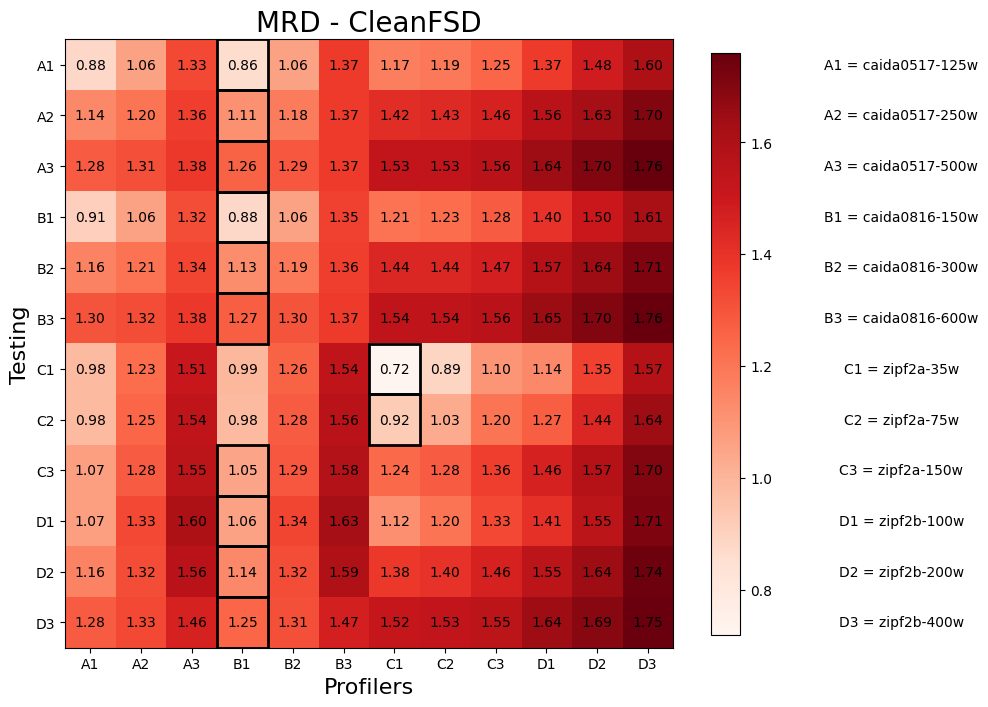

In [287]:
plot_mrd_between_profilers_gt()

---

In [172]:
def plot_mrd_in_single_profiler():
    # prepare profiler avg dirty fsd
    profiler_fsd = prepare_profiler_dirty_fsd_data()
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = []
        for i in range(10):
            profiler_avg_fsd[name].append(get_avg_fsd(fsd_list[5*i:min(5+5*i, len(fsd_list))]))
        
    # prepare testing avg fsd
    testing_fsd = prepare_testing_fsd_data()
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = []
        for i in range(10):
            testing_avg_fsd[name].append(get_avg_fsd(fsd_list[5*i:min(5+5*i, len(fsd_list))]))
        
    MRDs = []
    labels = list(profiler_avg_fsd.keys())
    indexs = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3']
    time_indexs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    
        
    for label in labels:
        MRDs = []
        for t_fsd in testing_avg_fsd[label]:
            single_MRDs = []
            for p_fsd in profiler_avg_fsd[label]:
                mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
                single_MRDs.append(mrd)
            MRDs.append(single_MRDs)
        # MRDs = []
        # for t_fsd in testing_fsd[label]:
        #     single_MRDs = []
        #     for p_fsd in profiler_fsd[label]:
        #         mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
        #         single_MRDs.append(mrd)
        #     MRDs.append(single_MRDs)
            
    
        # Plot heatmap
        plt.figure(figsize=(14, 14))
        plt.imshow(MRDs, cmap='Greens' , interpolation='nearest')

        # Add annotations for each cell
        for i in range(len(MRDs)):
            for j in range(len(MRDs[i])):
                plt.text(j, i, f'{MRDs[i][j]:.2f}', ha='center', va='center', color='black')

        plt.xticks(np.arange(len(time_indexs)), time_indexs, rotation=0)
        plt.yticks(np.arange(len(time_indexs)), time_indexs, rotation=0)
        # plt.xticks(np.arange(len(profiler_fsd[label])), [i for i in range(1, len(profiler_fsd[label])+1)], rotation=0)
        # plt.yticks(np.arange(len(testing_fsd[label])), [i for i in range(1, len(testing_fsd[label])+1)], rotation=0)
        

        plt.xlabel('Profilers', fontsize=16)
        plt.ylabel('Testing', fontsize=16)
        plt.title(f'{label}\'s MRD', fontsize=20)
        plt.colorbar(shrink=0.8)  # Add colorbar
        # for i, label in enumerate(labels):
        #     plt.text(len(labels)+4, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
        # plt.tight_layout()
        plt.show()   
        

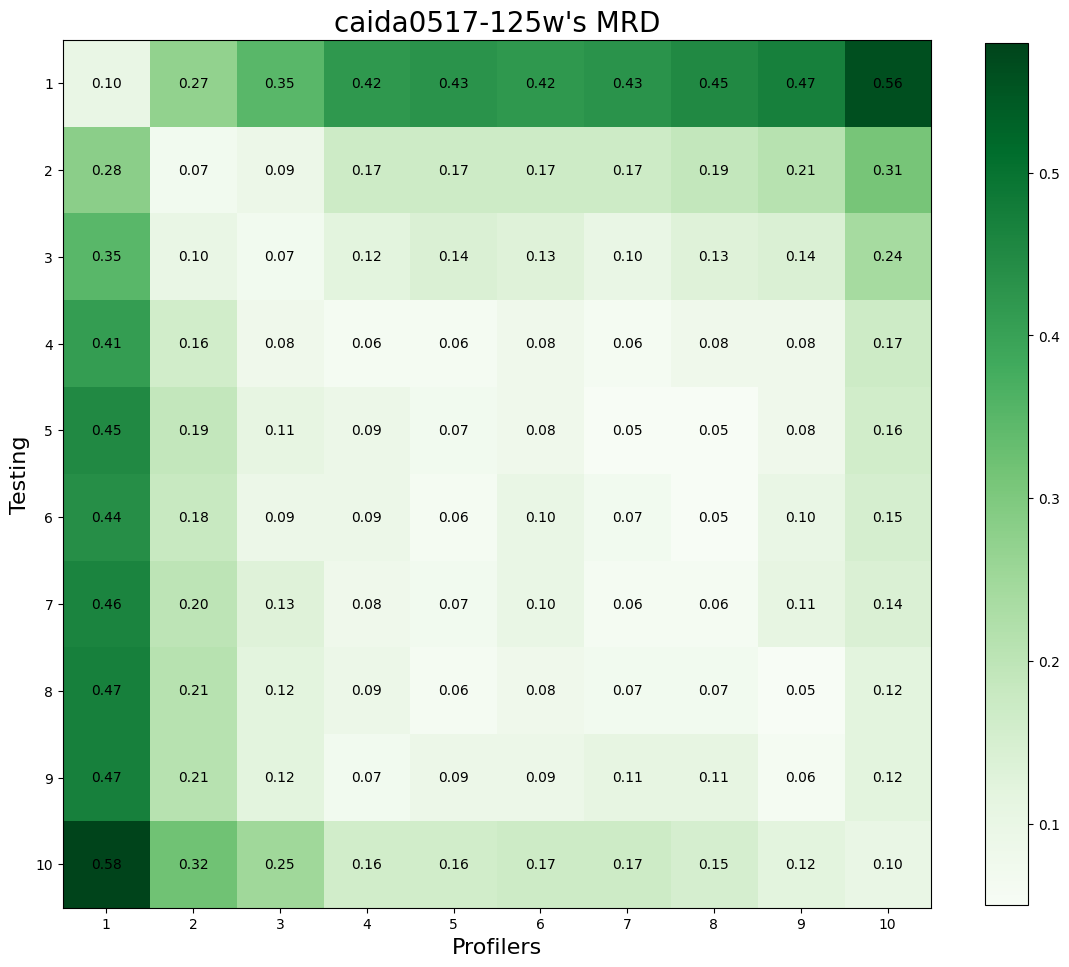

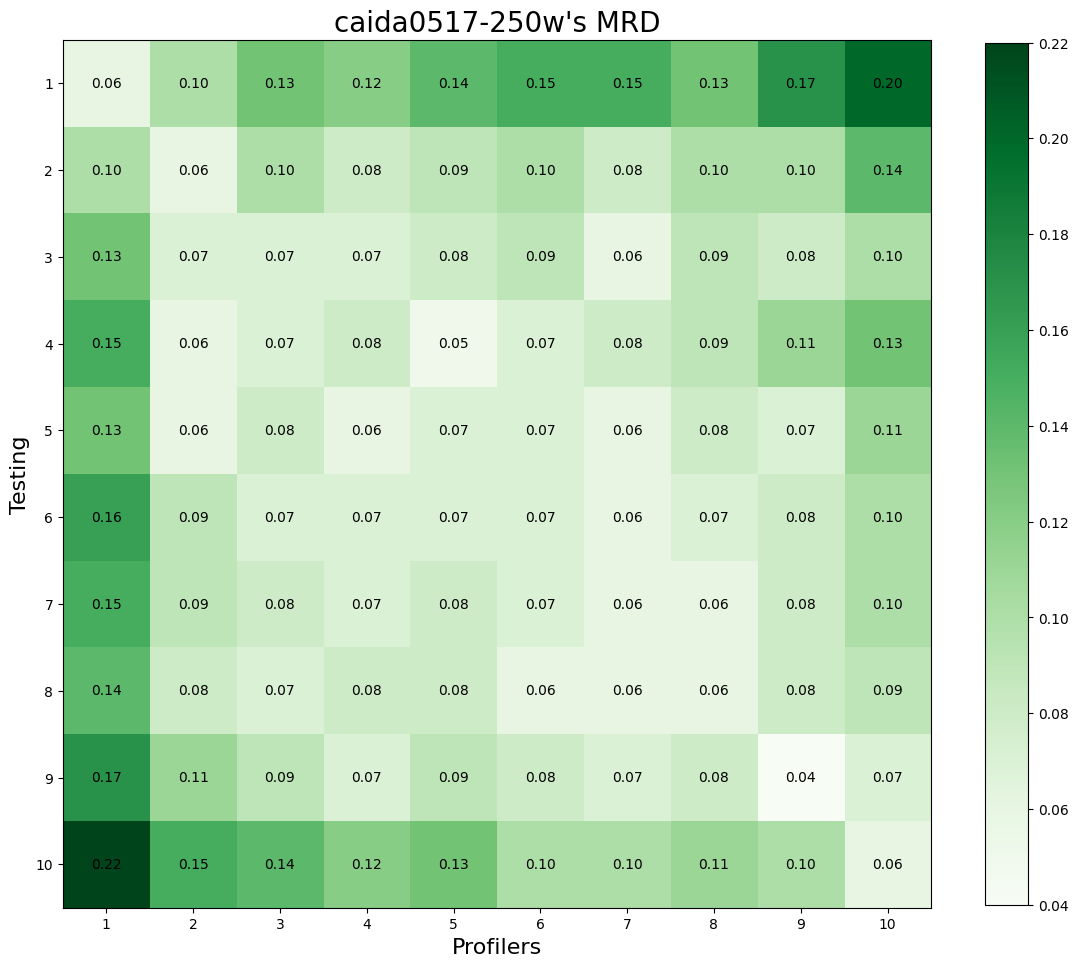

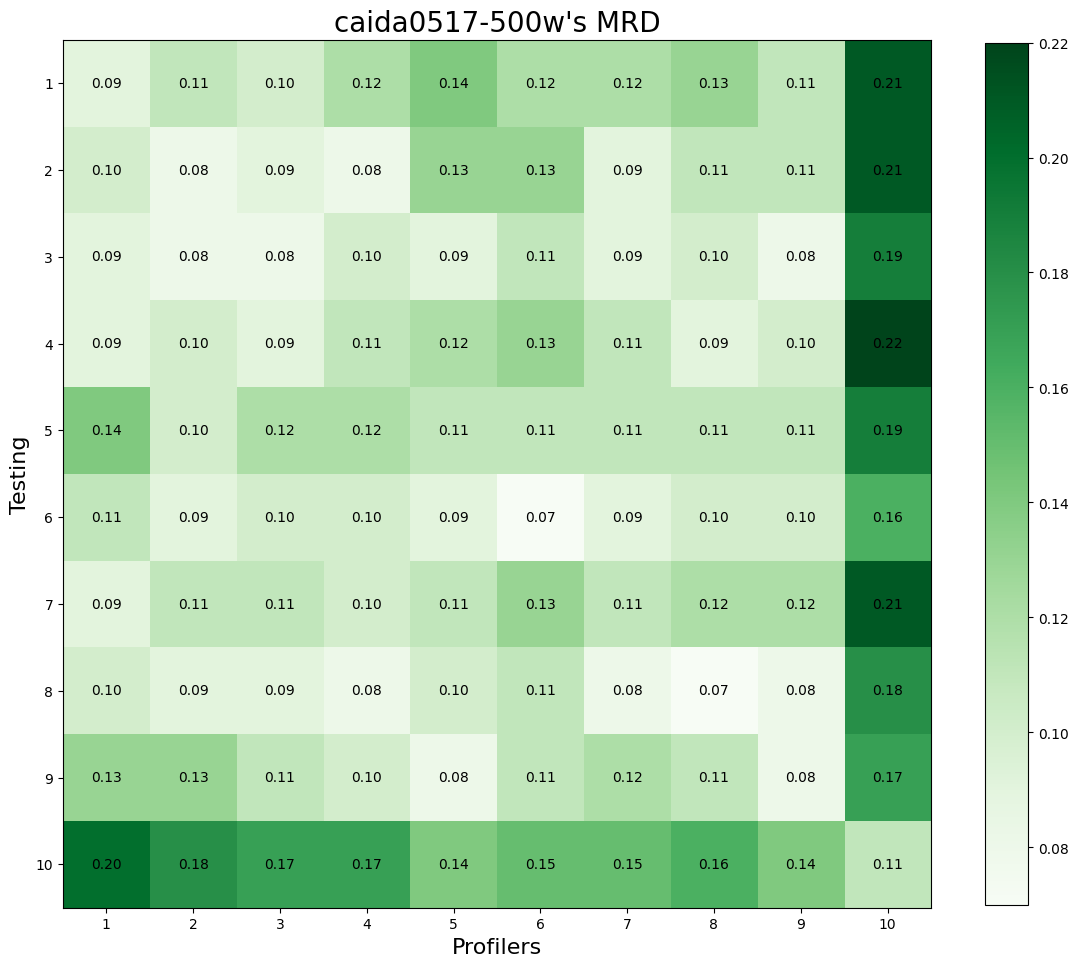

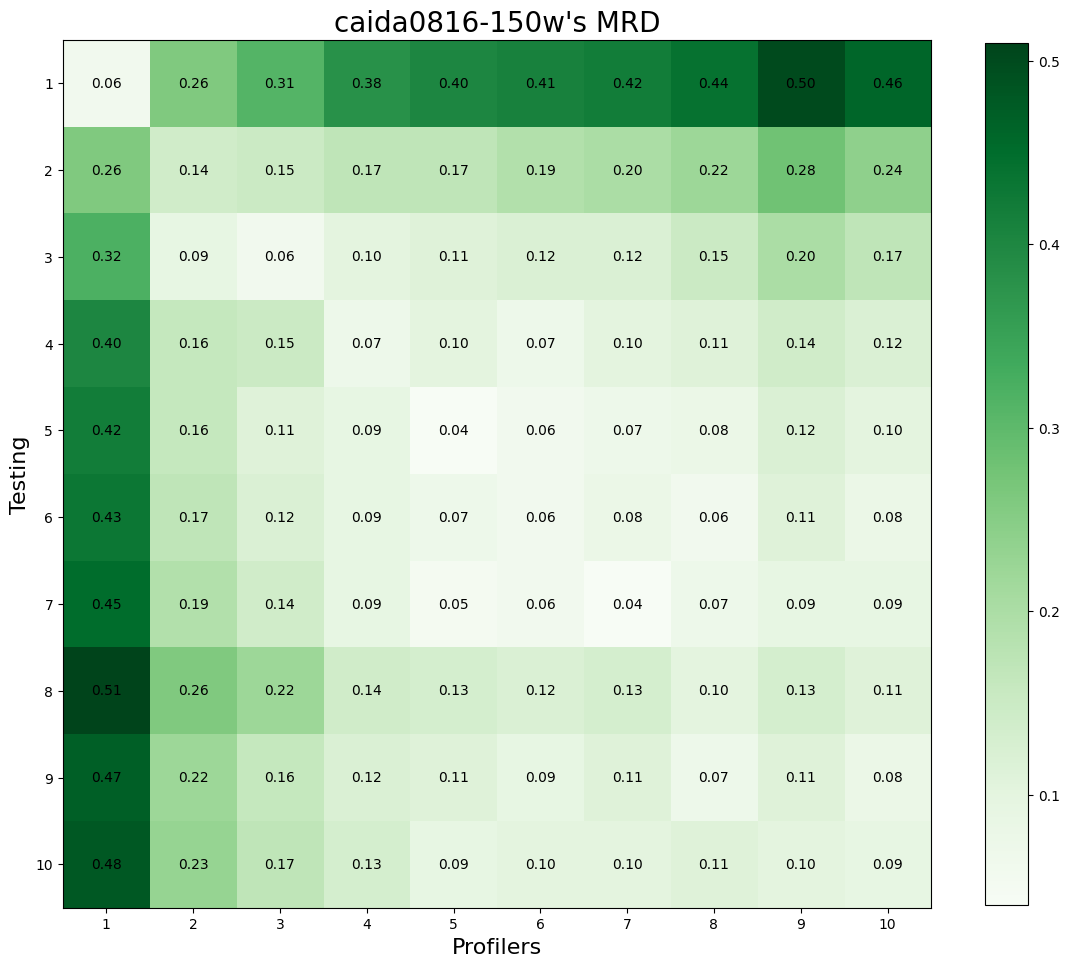

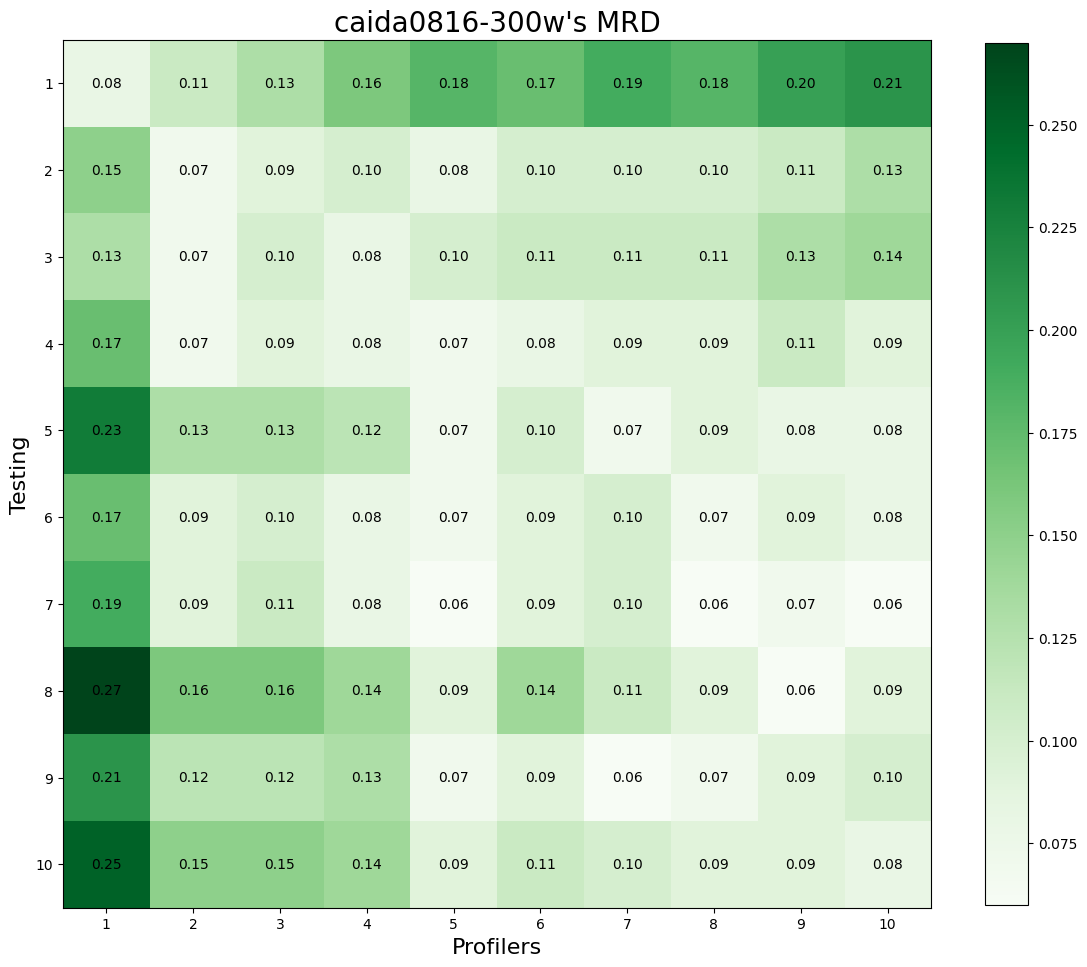

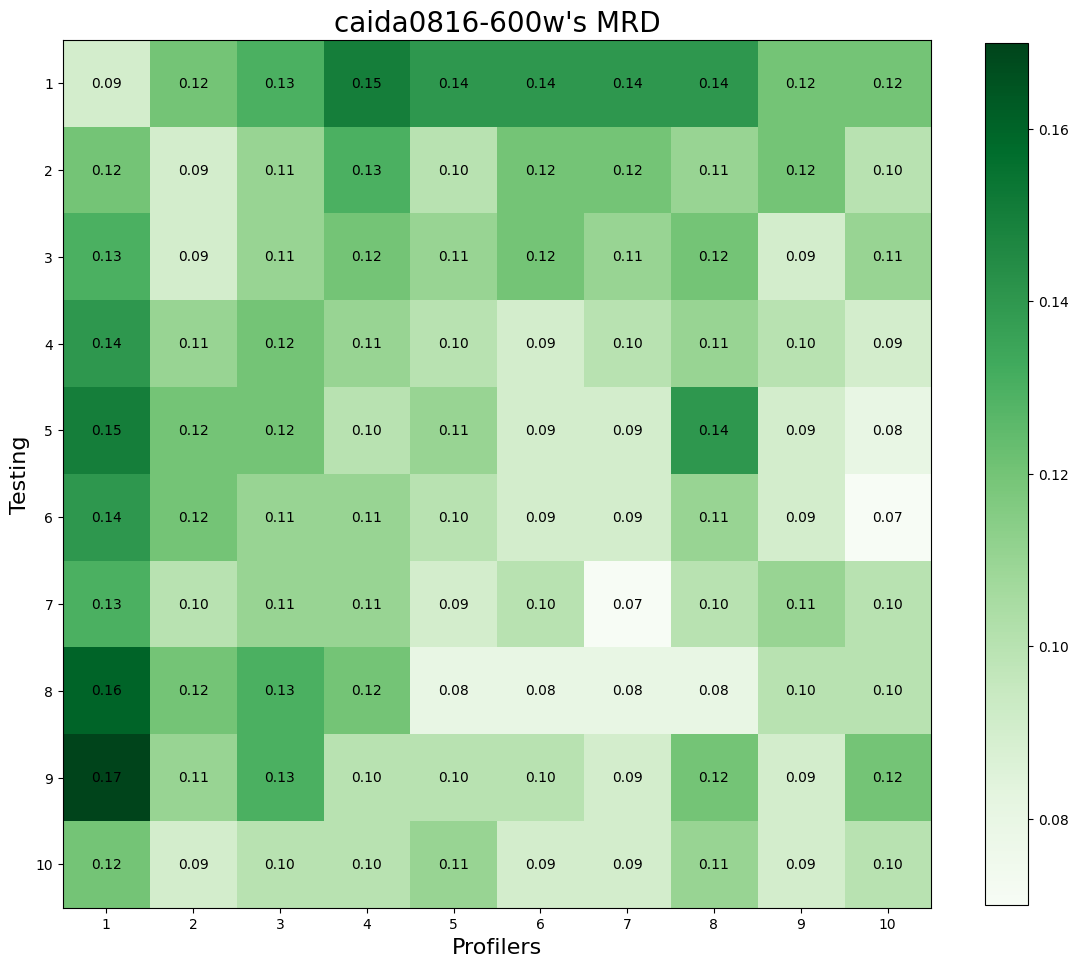

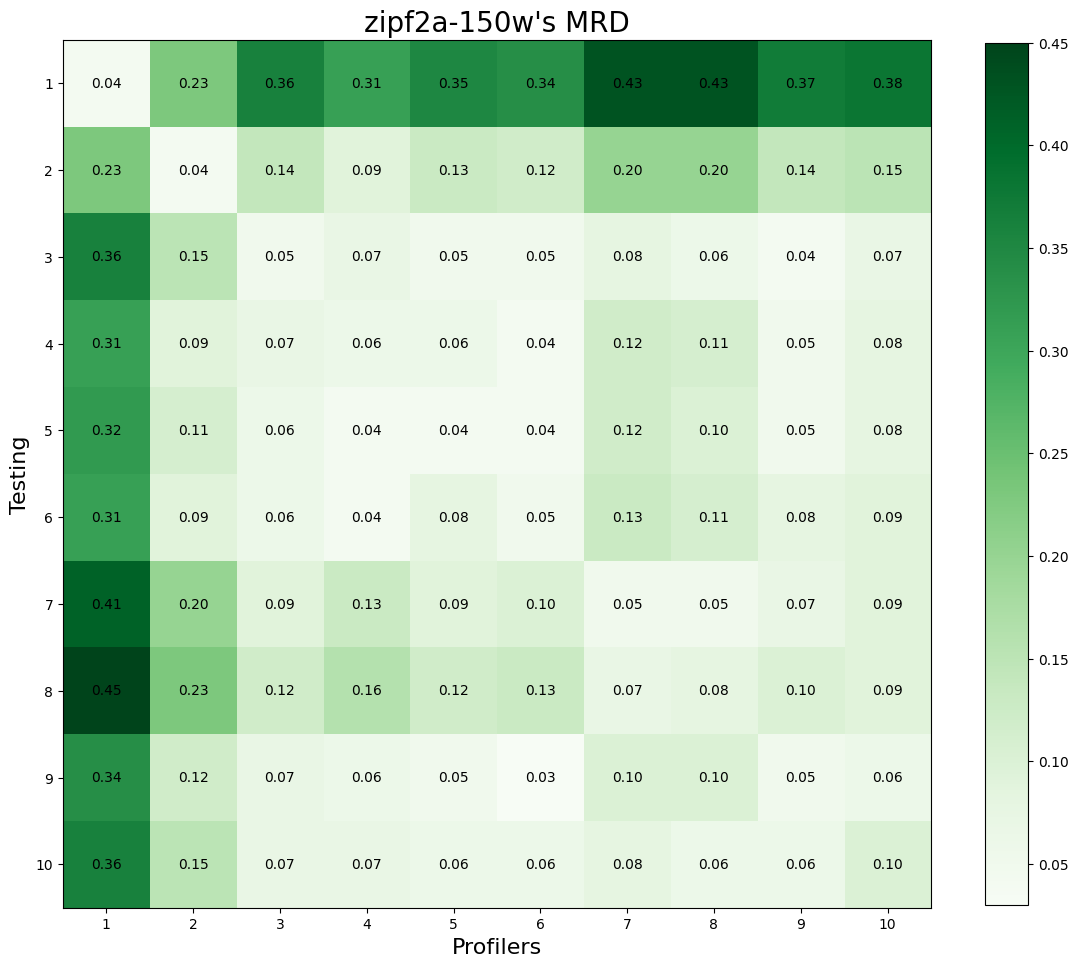

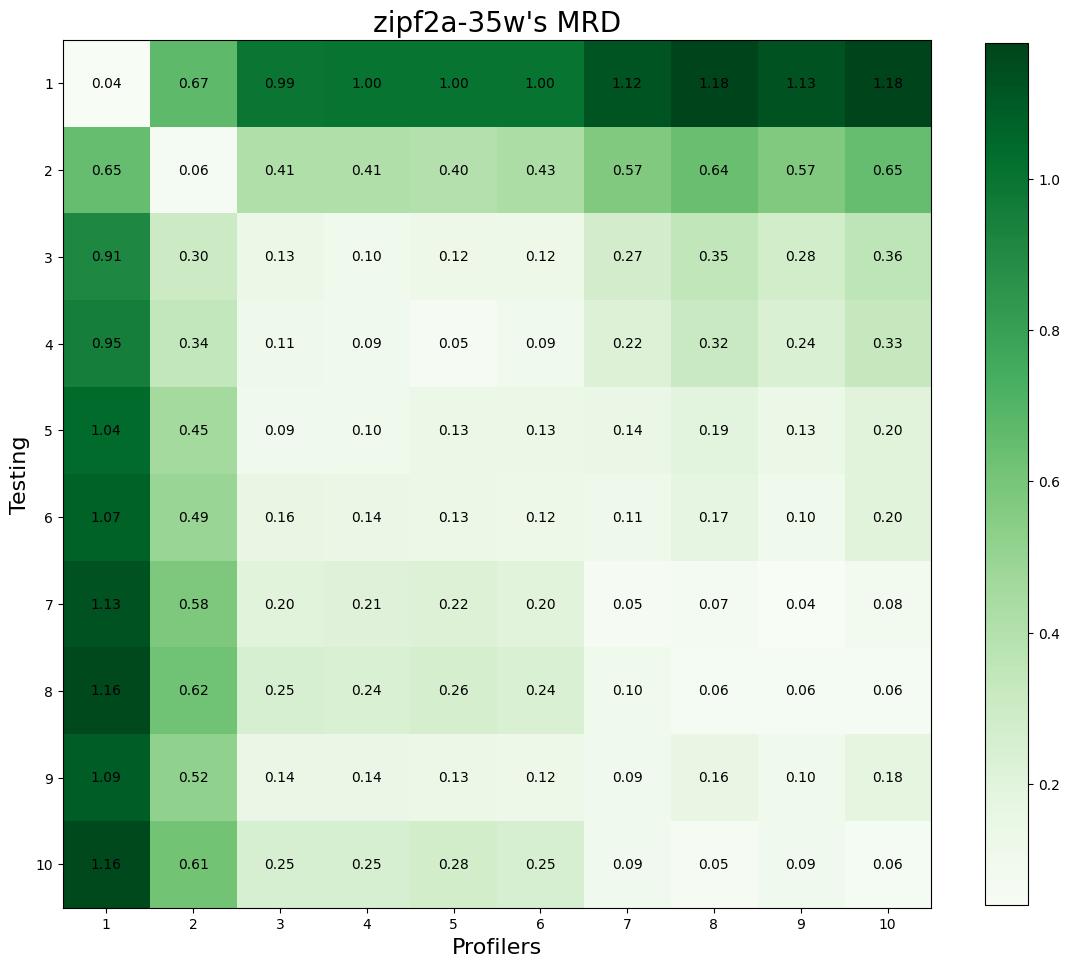

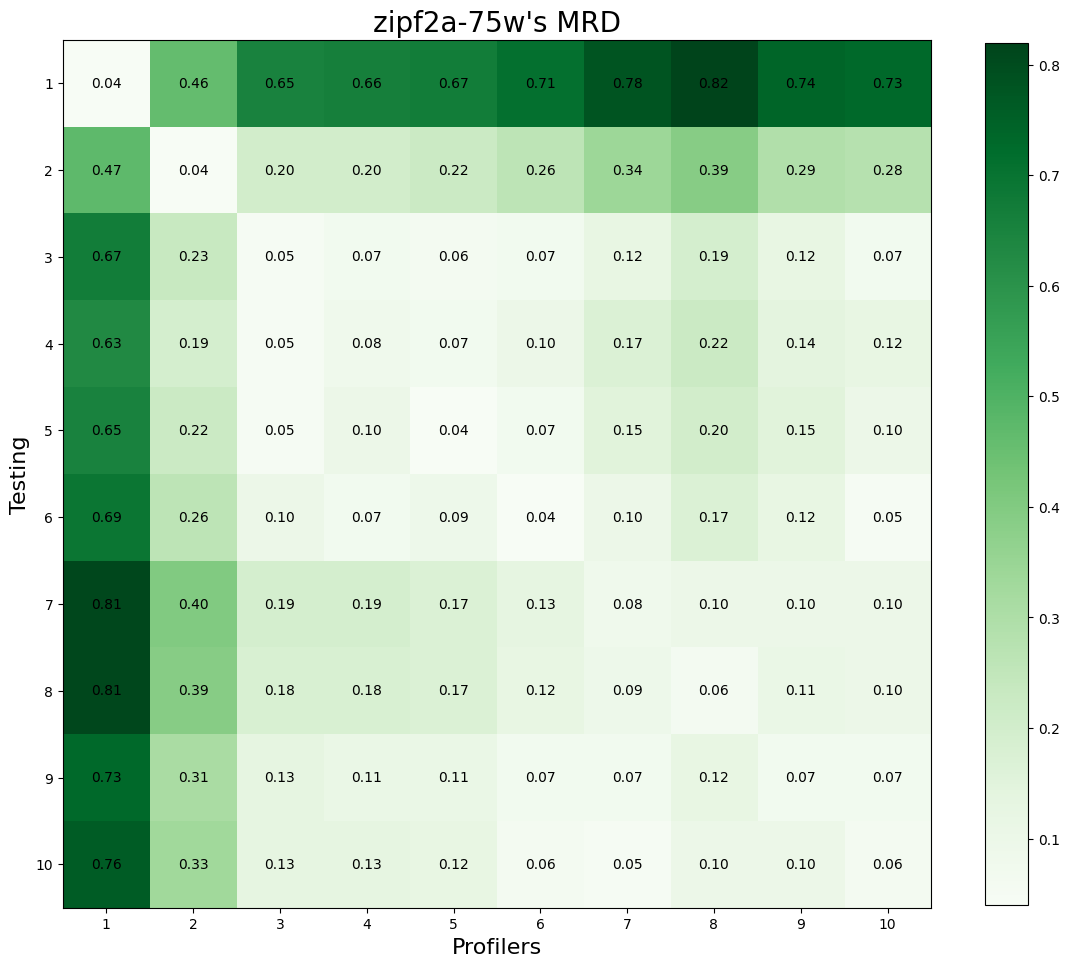

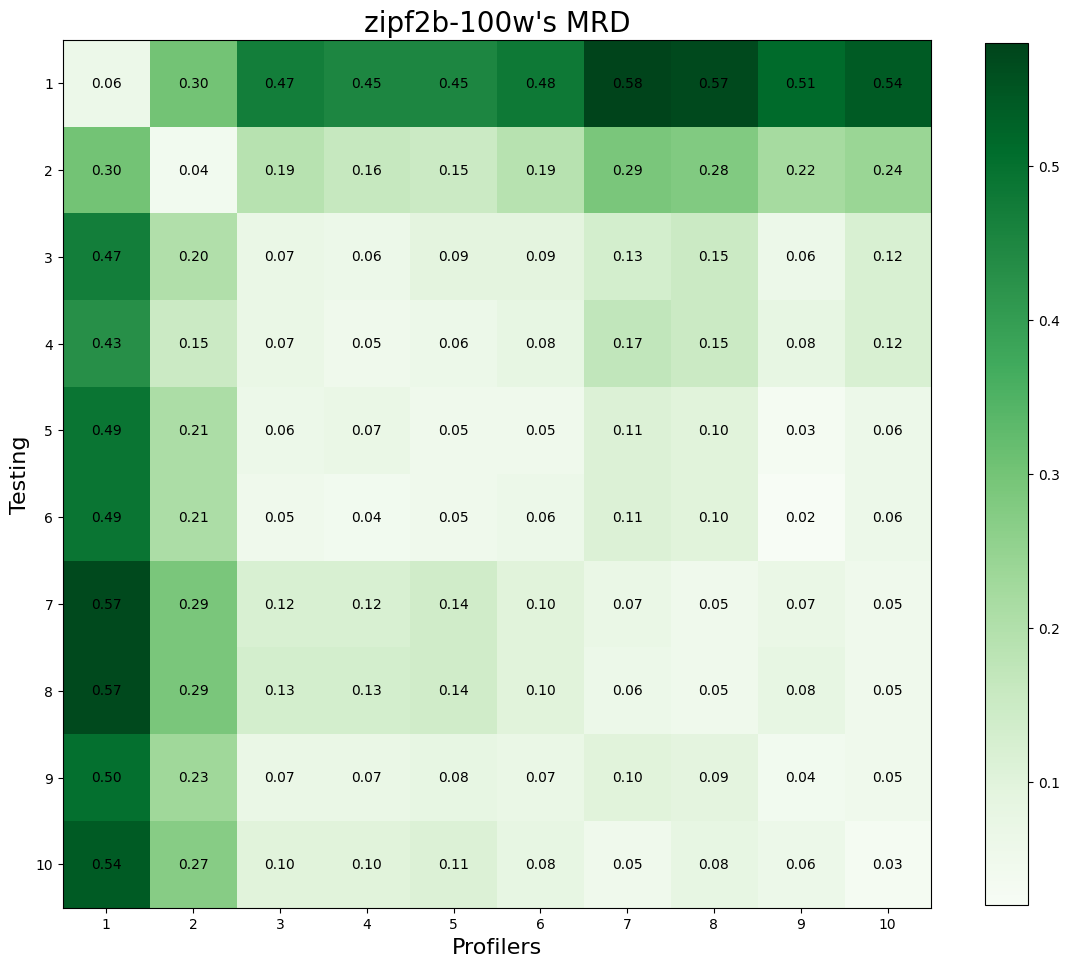

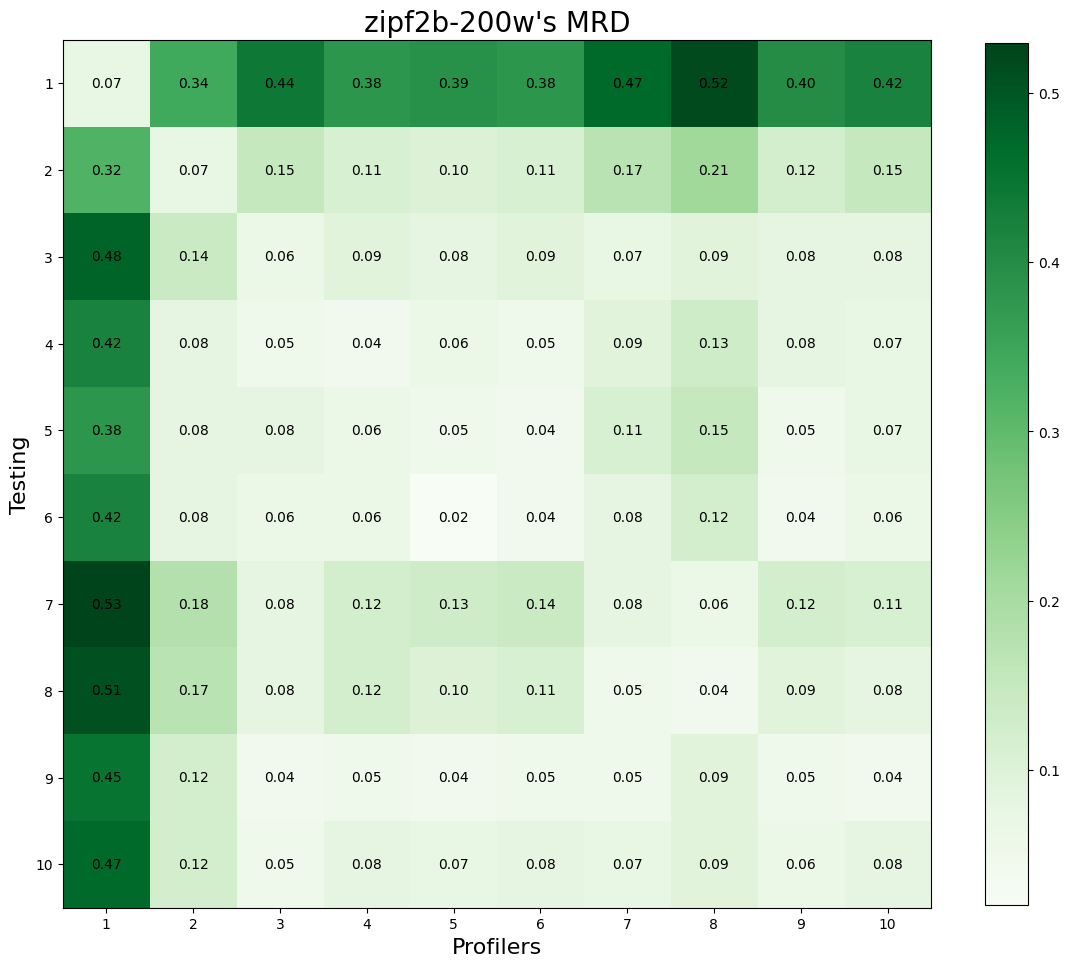

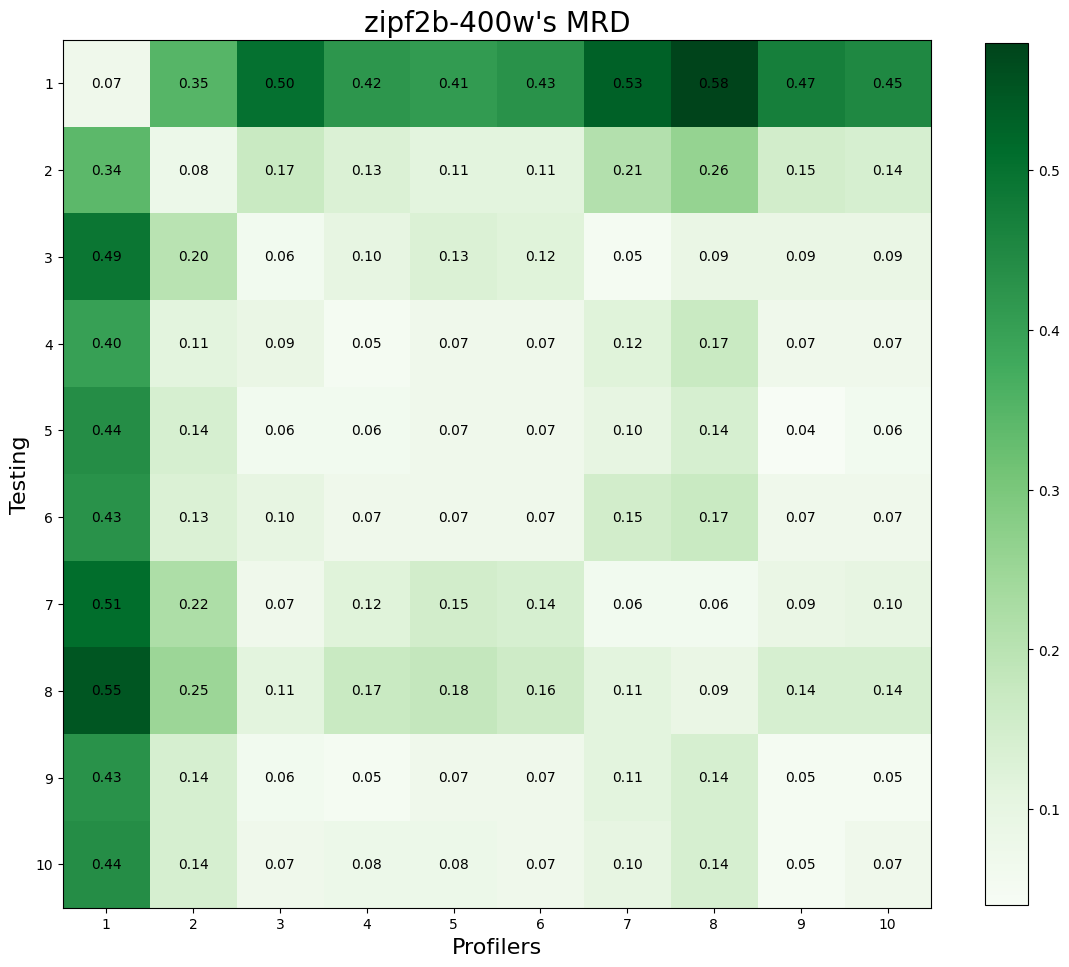

In [173]:
plot_mrd_in_single_profiler()

---

In [295]:
def plot_multi_mrd_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset=['caida0517-125w_10_.pcap'], window_size=200):
    
    # prepare profiler offline fsd
    profiler_fsd = prepare_profiler_dirty_fsd_data()
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    # prepare testing instant avg fsd
    testing_fsd = prepare_testing_fsd_data()
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = get_avg_fsd(fsd_list)
    
    # prepare testing gt avg fsd
    testing_gt_fsd = prepare_testing_gt_fsd_data()
    testing_gt_avg_fsd = {}
    for name, fsd_list in testing_gt_fsd.items():
        testing_gt_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    # adjust dataset order
    labels = list(profiler_fsd.keys())[::-1]
    
    # gt vs. instant & offline vs. instant
    gt_instant_mrd = []
    offline_instant_mrd = []
    
    ### avg
    # for label in labels:
    #     mrd1 = round(calculate_mrd(profiler_avg_fsd[label], testing_avg_fsd[label]), 2)
    #     mrd2 = round(calculate_mrd(testing_gt_avg_fsd[label], testing_avg_fsd[label]), 2)
    #     offline_instant_mrd.append(mrd1)
    #     gt_instant_mrd.append(mrd2)
    
    ### vote
    for label in labels:
        mrd1_total = 0.0
        mrd2_total = 0.0
        for i in range(len(testing_fsd)):
            mrd1_total += calculate_mrd(profiler_fsd[label][i], testing_fsd[label][i])
            mrd2_total += calculate_mrd(testing_gt_fsd[label][i], testing_fsd[label][i])
        mrd1 = round(mrd1_total/len(testing_fsd), 2)
        mrd2 = round(mrd2_total/len(testing_fsd), 2)
        offline_instant_mrd.append(mrd1)
        gt_instant_mrd.append(mrd2)
        
    # set position
    bar_width = 0.4
    bar_pos_a = np.arange(len(labels))
    bar_pos_b = bar_pos_a + bar_width

    # plot bar
    plt.figure(figsize=(10, 6))
    bars1 = plt.barh(bar_pos_b, offline_instant_mrd, height=bar_width, label='Dirty-Instant', alpha=0.7)
    bars2 = plt.barh(bar_pos_a, gt_instant_mrd, height=bar_width, label='Clear-Instant', alpha=0.7)
    plt.xlabel('WMRD', fontsize=16)
    plt.ylabel('Datasets', fontsize=16)
    plt.title('Compare the WMRD of Dirty FSD and Clean FSD', fontsize=20)
    plt.yticks(bar_pos_a + bar_width / 2, labels)  # 设置 y 轴刻度位置
    plt.grid(axis='x')
    plt.legend(ncol=2)
    
    for bars in [bars1, bars2]:
        for bar in bars:
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
                     va='center', ha='left', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()
    

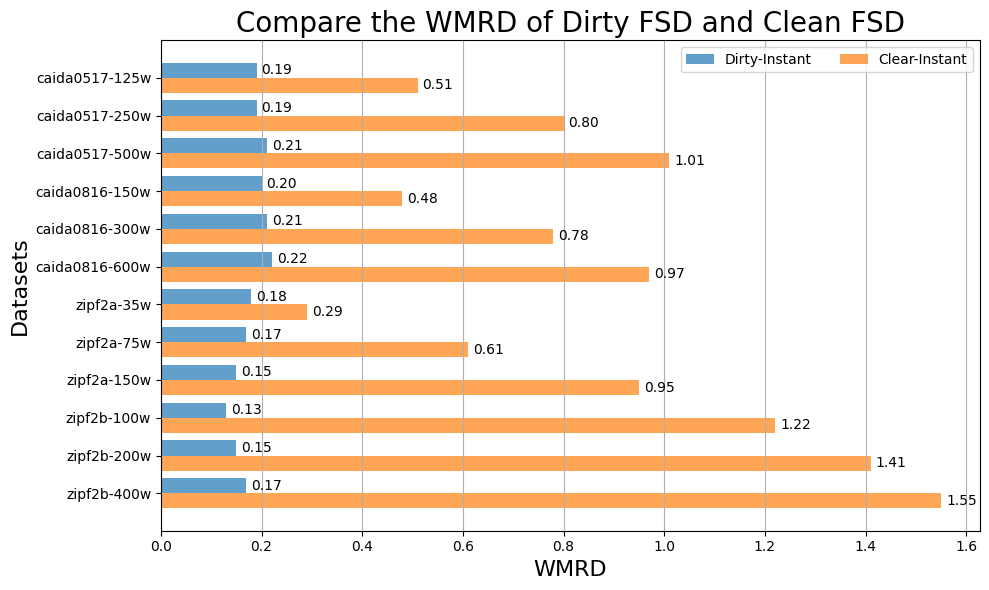

In [296]:
plot_multi_mrd_variation()

---

In [308]:
def parse_line(key, line):
    string_key = line.split(") ")[0]
    string_key += ")"

    left = line.split(") ")[1]

    left = left.replace("]", "")
    left = left.replace("[", "")
    splitted = left.split(" ")
    estimate = int(splitted[0])
    
    return string_key, estimate

In [321]:
def read_are_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'are.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(float(val))
            
    return res


In [302]:
def read_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [303]:
def read_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    sorted_fsd = dict(sorted(fsd.items()))
                            
                    res.append(sorted_fsd)
            
    return res

# read_fsd_data()

In [304]:
def get_sampled_flowkey(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
                            epochs=['10'], dataset = "caida0517-125w_10_.pcap", window_size=200, predict_time=1):
    
    sampled_flowkey = []
    for epoch in epochs:
        
        path = f"../SketchPadding/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                for l in range(0, 1):
                    key_window_dir = '%s/level_%02d/key_window_%d/' % (p, l, window_size)
                    if not os.path.isdir(key_window_dir):
                        continue
                    
                    cnt = 0 # count for predict dist
                    for file in sorted(os.listdir(key_window_dir)):
                        key_list = []
                        key_window_path = os.path.join(key_window_dir, file)
                            
                        f = open(key_window_path)
                        key = f.readline().strip()
                        for line in f:
                            string_key, estimate = parse_line(key, line.strip())
                            key_list.append(string_key)
                            
                        f.close()
                        
                        sampled_flowkey.append(key_list)
                        
                        cnt += 1
                        if predict_time != 0 and cnt >= int(predict_time*1000/window_size):
                            break
                        
                              
    return sampled_flowkey


In [350]:
def plot_multi_mrd_variation(mrds, widths, window_size=200):
    
    res = []
    labels = []
    xtick = [int(int(w)*4/1024) for w in widths]
    
    for name, mrd in mrds.items():
        labels.append(name)
        res.append(mrd)
    
    # print(name)
    # print(mrd_var)
    print(res)

    plt.figure(figsize=(8, 6))
        
    j = 0
    for i in range(len(res)):
        color = 'blue'
        if labels[i][:9] == 'caida0517':
            color = 'blue'
        elif labels[i][:9] == 'caida0816':
            color = 'red'
        elif labels[i][:6] == 'zipf2a':
            color = 'green'
        elif labels[i][:6] == 'zipf2b':
            color = 'orange'
            
        if j == 0:
            marker = 'o'
            j += 1
        elif j == 1:
            marker = 'X'
            j += 1
        else:
            marker = 's'
            j = 0
            
        plt.plot(res[i], label=labels[i], color=color, marker=marker, linewidth=2)

    # Add labels and legend
    plt.xlabel('Mem (KB)')
    plt.ylabel('WMRD')
    plt.title(f'Impact of Different Memory on Sketch FSD Error')
    plt.xticks(np.arange(len(xtick)), xtick)
    plt.legend(loc='upper right', ncol=math.ceil(len(res)/6))
    plt.grid()

    # Show the plot
    plt.show()
    

In [327]:
def predict_sketch_error_single_slot(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd_est = {}
    res_fsd_gt = {}
    res_flowkey = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [] 
            
            fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total2 = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total2 = read_single_window_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd_est[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            res_fsd_gt[name] = fsd_total2[:-1] # ignore last window (less than 200ms)
            res_flowkey[name] = get_sampled_flowkey(dataset=d, width=w, predict_time=0)
            
    
    for i in range(len(label)):

        # calculate mrd
        for j in range(0, len(res_fsd_est[label[i]])):
            res_mrd[label[i]].append(calculate_mrd(res_fsd_gt[label[i]][j], res_fsd_est[label[i]][j]))
            # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
       
    c = len(width)
    mrd_set = {}
    for i in range(int(len(label)/c)):
        mrd_set[label[i*c][:-9]] = []
        for j in range(c):
            mrd_set[label[i*c][:-9]].append(sum(res_mrd[label[i*c+j]])/len(res_mrd[label[i*c+j]]))
        
    
    plot_multi_mrd_variation(mrd_set, width, window_size)

[[0.46043870871606024, 0.2714455099890371, 0.11378961821336202, 0.029893883111768663, 0.0060000000000000045], [0.27462976168935527, 0.10819752429406194, 0.028893617021276616, 0.006212765957446811, 0.0013617021276595748], [0.10853313890988048, 0.0295744680851064, 0.005446808510638301, 0.0009787234042553195, 4.2553191489361704e-05], [0.46994936243632024, 0.28305593613133095, 0.1211647456381252, 0.031591836734693894, 0.007142857142857147], [0.2855274371879817, 0.12083815377076294, 0.03183673469387757, 0.007142857142857147, 0.001102040816326531], [0.12318367346938769, 0.032938775510204105, 0.0068979591836734735, 0.001102040816326531, 0.00012244897959183673], [0.18920611326071202, 0.052184234974630185, 0.011387755102040821, 0.0017142857142857153, 0.00036734693877551024], [0.05400000000000001, 0.010897959183673476, 0.002000000000000001, 0.00024489795918367346, 4.0816326530612245e-05], [0.009543110163900333, 0.0015756133089906274, 0.00029337340636967374, 8.163265306122449e-05, 0.0], [0.550333

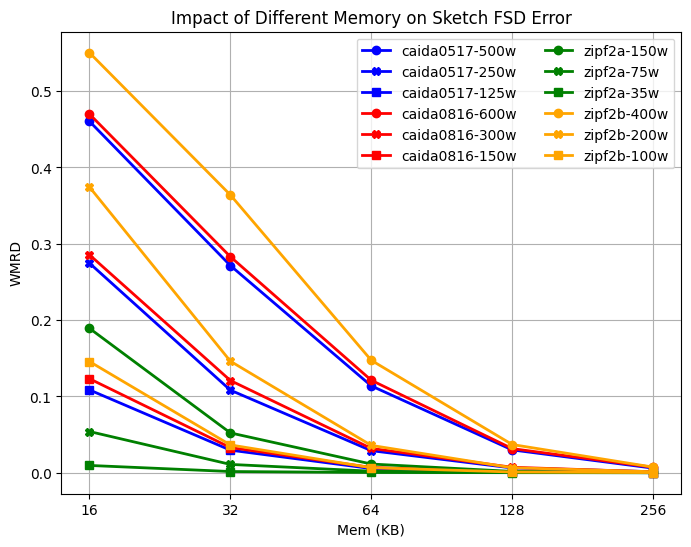

In [351]:
predict_sketch_error_single_slot(width=[4096, 8192, 16384, 32768, 65536], datasets=pcap_file[:12], window_size=200, dev=3, ws=25)

In [352]:
def plot_multi_are_variation(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida20180517_10_caida20180816_0.pcap'], window_size=200):
    
    res = []
    labels = []
    for d in datasets:
        ares = []
        labels.append(d[:-9])
        for w in width:
            are = read_are_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            ares.append(sum(are)/len(are))
        res.append(ares)
    
        # print(mrd_var)
        
    xtick = [int(int(w)*4/1024) for w in width]
    plt.figure(figsize=(8, 6))
        
    j = 0
    for i in range(len(res)):
        color = 'blue'
        if labels[i][:9] == 'caida0517':
            color = 'blue'
        elif labels[i][:9] == 'caida0816':
            color = 'red'
        elif labels[i][:6] == 'zipf2a':
            color = 'green'
        elif labels[i][:6] == 'zipf2b':
            color = 'orange'
            
        if j == 0:
            marker = 'o'
            j += 1
        elif j == 1:
            marker = 'X'
            j += 1
        else:
            marker = 's'
            j = 0
            
        plt.plot(res[i], label=labels[i], color=color, marker=marker, linewidth=2)

    # Add labels and legend
    plt.xlabel('Mem (KB)')
    plt.ylabel('ARE')
    plt.title(f'Impact of Different Memory on Sketch ARE')
    plt.xticks(np.arange(len(xtick)), xtick)
    plt.legend(loc='upper right', ncol=math.ceil(len(res)/6))
    plt.grid()

    # Show the plot
    plt.show()
        

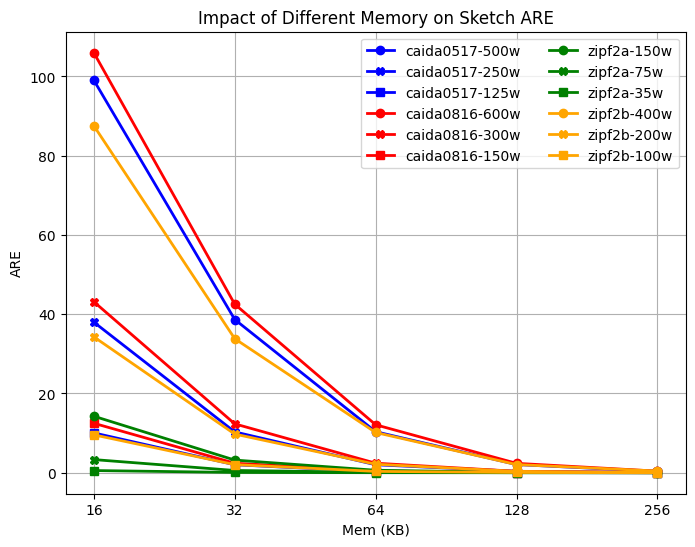

In [353]:
plot_multi_are_variation(width=[4096, 8192, 16384, 32768, 65536], datasets=pcap_file[:12], window_size=200)